In [1]:
!pip install -U -q transformers datasets peft accelerate bitsandbytes

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 79.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.4/491.4 kB 31.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 411.1/411.1 kB 24.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 354.7/354.7 kB 19.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.1/76.1 MB 23.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 kB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 31.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
from datasets import load_dataset

dataset = load_dataset("OpenHust/vietnamese-summarization", split="train")


README.md:   0%|          | 0.00/1.62k [00:00<?, ?B/s]

Kmeans_1024_new.csv:   0%|          | 0.00/32.3M [00:00<?, ?B/s]

Kmeans_512_new.csv:   0%|          | 0.00/25.0M [00:00<?, ?B/s]

Kmeans_512_token_new.csv:   0%|          | 0.00/29.1M [00:00<?, ?B/s]

bio_medicine.csv:   0%|          | 0.00/33.6M [00:00<?, ?B/s]

herding_512_bio_medicine.csv:   0%|          | 0.00/25.1M [00:00<?, ?B/s]

herding_bio_medicine.csv:   0%|          | 0.00/32.3M [00:00<?, ?B/s]

herding_prompt_512_bio_medicine.csv:   0%|          | 0.00/29.1M [00:00<?, ?B/s]

Generating train split: 0 examples [00:00, ? examples/s]

In [3]:
from transformers import AutoTokenizer

model_id = "bigscience/bloom-560m"
tokenizer = AutoTokenizer.from_pretrained(model_id)
tokenizer.pad_token = tokenizer.eos_token  # required for BLOOM
dataset = dataset.rename_columns({"Document": "text", "Summary": "summary"})
dataset = dataset.remove_columns(["Unnamed: 0", "Dataset"])
max_length = 768
def is_short_enough(example):
    prompt = f"Tóm tắt văn bản sau:\n{example['text']}\nTóm tắt:"
    full_text = prompt + example['summary']
    tokenized = tokenizer(full_text, truncation=False)
    return len(tokenized["input_ids"]) <= 768

dataset = dataset.filter(is_short_enough)
print(len(dataset))
# Optional: use a subset for speed (adjust number as needed)
subDataset = dataset.shuffle(seed=666).select(range(11000))

# Split into train/validation
train_test_split = subDataset.train_test_split(test_size=0.1, seed=42)
train_dataset = train_test_split["train"]
val_dataset = train_test_split["test"]


tokenizer_config.json:   0%|          | 0.00/222 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/14.5M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/85.0 [00:00<?, ?B/s]

Filter:   0%|          | 0/74564 [00:00<?, ? examples/s]

62070


In [4]:
import pandas as pd
train_dataset.to_pandas().iloc[99, 0]

'Để biết được giới hạn của mình, bạn cần thử nghiệm nhiều lần và rút kinh nghiệm từ những phép thử đó. Nói chung, giới hạn được xác định dựa trên cân nặng và giới tính. Phụ nữ vốn có tầm vóc nhỏ, cơ thể nhẹ, và có lượng mỡ tự nhiên cao thường chịu tác động mạnh hơn khi uống rượu bia nhiều. Nói chung để tránh tình trạng buồn nôn, bạn nên dùng liều lượng như sau:   Nam giới  45-67 kg: 1-2 cốc/giờ 68-90+ kg: 2-3 cốc/giờ     Nữ giới  40-45 kg: 1 cốc/giờ 46-81 kg: 1-2 cốc/giờ 82-90+ kg: 2-3 cốc/giờ Điều này thường khó thực hiện, đặc biệt khi bạn bè thúc ép bạn uống thêm và bản thân không thể kiềm chế khi có men trong người. Bạn có thể nói, "Nếu uống nữa mình sẽ nôn ra đấy. " Câu này đặc biệt hiệu quả khi bạn nói với chủ nhà tổ chức tiệc tùng. Hạ nhiệt cơ thể có tác dụng mang lại cảm giác dễ chịu. Không khí buổi tiệc thường nóng nực, và việc ra ngoài hít thở giúp bạn tránh được không khí ngột ngạt gây buồn nôn. Ngoài ra, bạn sẽ tránh được việc nôn mửa trước mặt người khác và địa điểm bên ngo

In [5]:
import numpy as np



def preprocess(examples):
    prompts = [f"Tóm tắt văn bản sau:\n{text}\nTóm tắt: " for text in examples["text"]]
    targets = examples["summary"]

    full_inputs = [prompt + summary for prompt, summary in zip(prompts, targets)]
    tokenized = tokenizer(
        full_inputs,
        padding="max_length",
        truncation=True,
        max_length=max_length,  
    )

    labels = tokenizer(
        full_inputs,
        padding="max_length",
        truncation=True,
        max_length=max_length,
    )["input_ids"]

    

    tokenized["labels"] = labels
    return tokenized


# Tokenize both sets
train_tokenized = train_dataset.map(
    preprocess, batched=True, remove_columns=["text", "summary"]
)
val_tokenized = val_dataset.map(
    preprocess, batched=True, remove_columns=["text", "summary"]
)


Map:   0%|          | 0/9900 [00:00<?, ? examples/s]

Map:   0%|          | 0/1100 [00:00<?, ? examples/s]

In [6]:
import torch
import gc
gc.collect()
torch.cuda.empty_cache()
import os
os.environ["PYTORCH_CUDA_ALLOC_CONF"] = "expandable_segments:True"

import torch
from transformers import AutoModelForCausalLM
from peft import get_peft_model, LoraConfig, TaskType, prepare_model_for_kbit_training

from transformers import AutoModelForCausalLM, BitsAndBytesConfig
from accelerate import PartialState

# device_map={'':torch.cuda.current_device()}

model = AutoModelForCausalLM.from_pretrained(
    model_id,
    device_map="auto"
)
model.config.pad_token_id = tokenizer.pad_token_id


peft_config = LoraConfig(
    r=8,
    lora_alpha=32,
    target_modules=["query_key_value"],  # You can try others like "dense", "mlp" if needed
    lora_dropout=0.05,
    bias="none",
    task_type=TaskType.CAUSAL_LM,
)

model = get_peft_model(model, peft_config)
model.print_trainable_parameters()


2025-05-04 03:55:55.024850: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1746330955.239671      20 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1746330955.300765      20 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


config.json:   0%|          | 0.00/693 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.12G [00:00<?, ?B/s]

trainable params: 786,432 || all params: 560,001,024 || trainable%: 0.1404


In [7]:
from transformers import TrainingArguments, Trainer
import torch
LOG_STEP = 50
EVAL_STEP = 300
training_args = TrainingArguments(
    output_dir="./output",
    learning_rate =1e-5,
    logging_first_step=True,
    per_device_train_batch_size=2,
    per_device_eval_batch_size=2,
    gradient_accumulation_steps=4,
    num_train_epochs=6,
    eval_strategy="steps",  
    eval_steps=EVAL_STEP,
    save_steps=EVAL_STEP,
    save_strategy="steps",
    save_total_limit=2,
    label_names=["labels"],
    load_best_model_at_end=True,  
    metric_for_best_model="eval_loss",
    greater_is_better=False,
    logging_steps=LOG_STEP,
    fp16=True,
    report_to="none",
    remove_unused_columns=False,
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_tokenized,
    eval_dataset=val_tokenized,
    tokenizer=tokenizer,
)

trainer.train()


/tmp/ipykernel_20/3773673513.py:28: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Step,Training Loss,Validation Loss
300,1.778200,1.776569
600,1.712700,1.712203
900,1.636200,1.678603
1200,1.661000,1.658801
1500,1.657100,1.645390
1800,1.603500,1.635764
2100,1.628400,1.628146
2400,1.602400,1.622127
2700,1.589400,1.617585
3000,1.638900,1.613916


TrainOutput(global_step=7422, training_loss=2.7123541731103287, metrics={'train_runtime': 19166.8299, 'train_samples_per_second': 3.099, 'train_steps_per_second': 0.387, 'total_flos': 8.2901596731605e+16, 'train_loss': 2.7123541731103287, 'epoch': 5.995555555555556})

In [8]:
model.save_pretrained("./bloom560m-vietnamese-summary-lora")
tokenizer.save_pretrained("./bloom560m-vietnamese-summary-lora")


('./bloom560m-vietnamese-summary-lora/tokenizer_config.json',
 './bloom560m-vietnamese-summary-lora/special_tokens_map.json',
 './bloom560m-vietnamese-summary-lora/tokenizer.json')

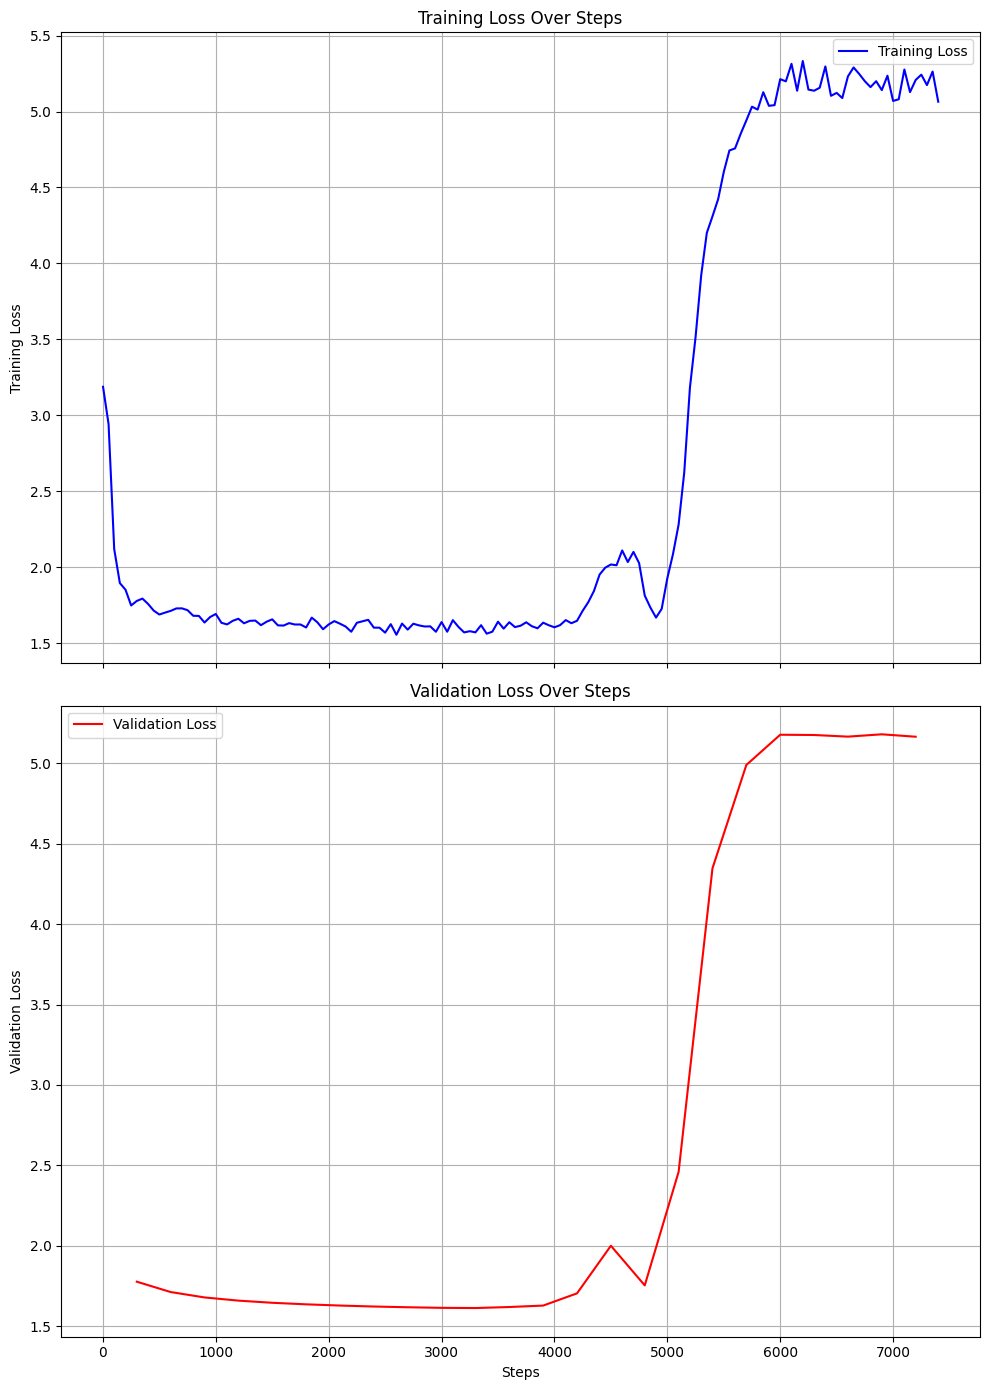

In [9]:
import matplotlib.pyplot as plt
import os
log_history = trainer.state.log_history

# Separate logs
train_steps, train_loss = [], []
eval_steps, val_loss = [], []

for log in log_history:
    if "loss" in log and "step" in log:
        train_steps.append(log["step"])
        train_loss.append(log["loss"])
    if "eval_loss" in log and "step" in log:
        eval_steps.append(log["step"])
        val_loss.append(log["eval_loss"])

# Plot in two subplots
fig, axes = plt.subplots(2, 1, figsize=(10, 14), sharex=True)

# Training loss subplot
axes[0].plot(train_steps, train_loss, label="Training Loss", color='blue')
axes[0].set_ylabel("Training Loss")
axes[0].set_title("Training Loss Over Steps")
axes[0].grid(True)
axes[0].legend()

# Validation loss subplot
axes[1].plot(eval_steps, val_loss, label="Validation Loss", color='red')
axes[1].set_xlabel("Steps")
axes[1].set_ylabel("Validation Loss")
axes[1].set_title("Validation Loss Over Steps")
axes[1].grid(True)
axes[1].legend()
os.mkdir("./visualize")
plt.savefig("./visualize/loss_plot.png", dpi=300)
plt.tight_layout()
plt.show()


In [10]:
from peft import PeftModel
base = AutoModelForCausalLM.from_pretrained("bigscience/bloom-560m", device_map="auto")
model = PeftModel.from_pretrained(base, "./bloom560m-vietnamese-summary-lora")


In [11]:
import torch

input_text = "Tóm tắt văn bản sau:\n" + dataset[0]["text"] + "\nTóm tắt:"
input_ids = tokenizer(input_text, return_tensors="pt").to("cuda")

output = model.generate(
    **input_ids,
    max_new_tokens=100,
    do_sample=True,
    top_k=50,
    temperature=0.8
)

print(tokenizer.decode(output[0], skip_special_tokens=True))


Tóm tắt văn bản sau:
Chiều 12/3 , ông Vũ Hùng Triều , Trưởng phòng Tổ chức hành chính Bệnh viện Đa khoa huyện Đông Hoà ( Phú Yên ) cho biết , bé trai sơ sinh bị bỏ rơi được người dân đưa đến cấp cứu sức khoẻ đã dần ổn định ." Bệnh viện sẽ tiếp tục theo dõi , điều trị chống nhiễm trùng cho bé và chờ chính quyền làm thủ tục xác định sự việc để làm giấy chứng sinh cho người bảo hộ " , ông này nói .Bé trai mới sinh nặng 2,7 kg bị bỏ rơi hiện được chăm sóc ở bệnh viện .Trước đó rạng sáng 11/3 , Bệnh viện Đông Hoà tiếp nhận cháu bé từ tay chị Nguyễn Thị Tâm ( 32 tuổi , xã Hoà Hiệp Nam , huyện Đông Hoà ) .Theo chị Tâm , 5h sáng , sau khi ngủ dậy chị mở cửa ra sân thì phát hiện chiếc thùng carton đặt gần mép sân , bên trong có bé trai sơ sinh chưa cắt rốn , cơ thể tím tái , thở yếu , trên người có nhiều vết kiến đốt .Chị Tâm đã hô hoán nhờ nhiều người đến trợ giúp , sau đó gọi y tá đến cắt rốn và chở đến bệnh viện cấp cứu .Nhiều người đến Bệnh viện Đông Hoà chăm bé trai khi chị Tâm không có mặ

In [12]:
import shutil
shutil.make_archive("bloom560m-vietnamese-summary-lora", 'zip', "bloom560m-vietnamese-summary-lora")

'/kaggle/working/bloom560m-vietnamese-summary-lora.zip'